In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
from ipywidgets import interact
import numpy as np
import matplotlib as mpl
import arrow
%matplotlib inline

In [7]:
#############################################################################
# Prepare data and import into a dataframe
#############################################################################

# Export Data from healthkit using [qs-access](https://itunes.apple.com/us/app/qs-access/id920297614?mt=8) app 
exported_and_trandformed_csv_file = "data/weight.csv"
df = pd.read_csv(exported_and_trandformed_csv_file)

idx_weight = "Weight (lb)"
# make dateColumn a datetime.
idx_date="Start"
df[idx_date] = pd.to_datetime(df[idx_date])
df = df.set_index(df[idx_date])
df = df['2010/1/1':] # Throw away some junk data at the start of time
# Create Time Period Groups
idx_month_year="month_year" 
df[idx_month_year]=df[idx_date].apply(lambda t:f"{t.month}-{t.year-2000}")

idx_week_year="week_year" 
df[idx_week_year]=df[idx_date].apply(lambda t:f"{t.week}-{t.year-2000}")

# Helpful time aliases
df_alltime = df

In [8]:
def plot_weight_over_time(df, x):
    # In theory can use plot.ly (not free)  or Bokeh (not mpl compatible) but issues. So setting dimensions old school.
    # Manually setting the weight and width. 
    height_in_inches=8
    mpl.rc("figure", figsize=(2*height_in_inches,height_in_inches))
 
    ax = sns.boxplot(x=x, y=idx_weight, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.set_title("Weight")
    ax.set_xlabel("date")
    ax.set_ylabel("lbs")

# Recent Weight By Weeks

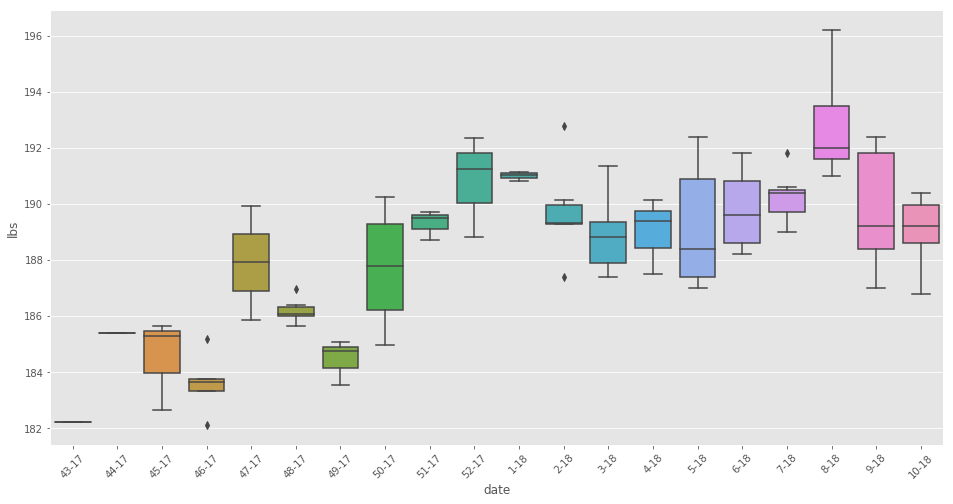

In [9]:
earliest = arrow.utcnow().shift(months=-5).date()
df_recent = df[df[idx_date] > earliest ]
plot_weight_over_time(df_recent,idx_week_year)

# Historical Weight By Month

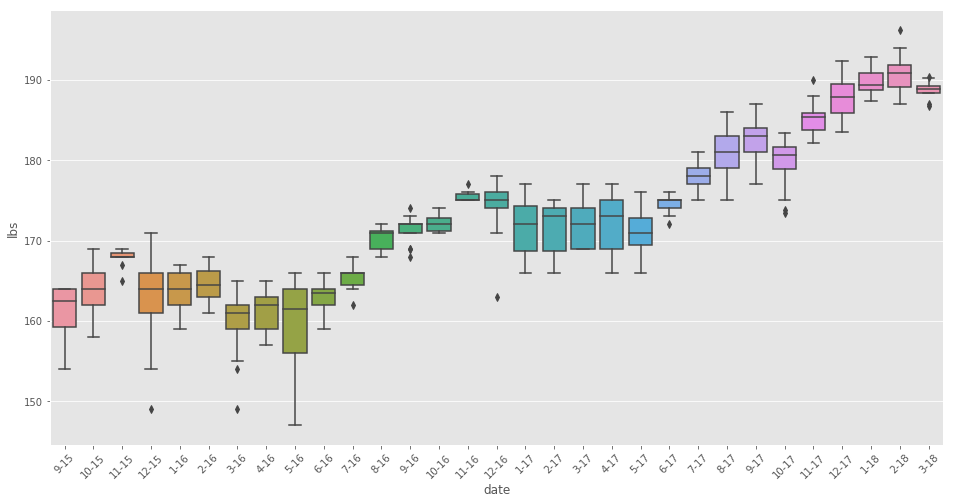

In [10]:
plot_weight_over_time(df_alltime,idx_month_year)

# Time Series Analysis Methodology using resampling

In [11]:
tempFrame = df.resample("W").apply([ len,np.min,np.median,np.max])
tempFrame.sort_index(ascending=False ).head(15)
# Can graph interactively using Bokeh @ 
# https://stackoverflow.com/questions/45972782/plot-time-series-graph-using-bokeh

Heart Rate (count/min)                      Weight (lb)  \
                              len   amin median   amax         len   
Start                                                                
2018-03-11                    6.0   92.0  107.5  125.0         6.0   
2018-03-04                    7.0   92.0  113.0  167.0         7.0   
2018-02-25                    7.0   83.0  101.0  128.0         7.0   
2018-02-18                    7.0   82.0  122.0  152.0         7.0   
2018-02-11                    7.0  104.0  113.0  167.0         7.0   
2018-02-04                    7.0   81.0  107.0  168.0         7.0   
2018-01-28                    3.0  107.0  117.0  170.0         3.0   
2018-01-21                    6.0   81.0  101.0  167.0         6.0   
2018-01-14                    6.0  107.0  118.0  158.0         6.0   
2018-01-07                    3.0   82.0  107.0  109.0         3.0   
2017-12-31                    3.0  117.0  138.0  148.0         3.0   
2017-12-24                    3.0  110.0  124.0  154.0         3.0   
2017-12-17                    4.0  109.0  117.5  136.0         4.0   
2017-12-10                    3.0   93.0  104.0  113.0         3.0   
2017-12-03                    6.0   86.0   97.5  113.0         6.0   

                                                
                  amin      median        amax  
Start                                           
2018-03-11  186.800000  189.200000  190.400000  
2018-03-04  187.000000  189.200000  192.400000  
2018-02-25  191.000000  192.000000  196.200000  
2018-02-18  189.000000  190.400000  191.800000  
2018-02-11  188.200000  189.600000  191.800000  
2018-02-04  187.000000  188.400000  192.400000  
2018-01-28  187.503154  189.377083  190.148701  
2018-01-21  187.392923  188.825928  191.361244  
2018-01-14  187.392923  189.321968  192.794248  
2018-01-07  190.810088  191.030550  191.140781  
2017-12-31  188.825928  191.251012  192.353324  
2017-12-24  188.715696  189.487314  189.707777  
2017-12-17  184.967838  187.778732  190.258932  
2017-12-10  183.534833  184.747376  185.078069  
2017-12-03  185.629225  186.070149  186.951998